## HR analytics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
general_data = pd.read_csv('general_data.csv')
manager_survey_data = pd.read_csv('manager_survey_data.csv')
employee_survey_data = pd.read_csv('employee_survey_data.csv')

In [3]:
data_dictionary = pd.read_excel('data_dictionary.xlsx')

In [4]:
in_time = pd.read_csv('in_time.csv')
out_time = pd.read_csv('out_time.csv')

In [5]:
general_data

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


In [6]:
manager_survey_data

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3
...,...,...,...
4405,4406,3,3
4406,4407,2,3
4407,4408,3,4
4408,4409,2,3


In [7]:
employee_survey_data

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0
...,...,...,...,...
4405,4406,4.0,1.0,3.0
4406,4407,4.0,4.0,3.0
4407,4408,1.0,3.0,3.0
4408,4409,4.0,1.0,3.0


In [8]:
data_dictionary

,Variable,Meaning,Levels
0,Age,Age of the employee,NaN
1,Attrition,Whether the employee left in the previous year...,NaN
2,BusinessTravel,How frequently the employees travelled for bus...,NaN
3,Department,Department in company,NaN
4,DistanceFromHome,Distance from home in kms,NaN
5,Education,Education Level,1 'Below College'
6,NaN,NaN,2 'College'
7,NaN,NaN,3 'Bachelor'
8,NaN,NaN,4 'Master'
9,NaN,NaN,5 'Doctor'


In [9]:
in_time

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,NaN,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,NaN,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,NaN,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,NaN,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,NaN,2015-01-02 09:20:32,2015-01-05 10:17:53,2015-01-06 10:26:51,2015-01-07 10:06:58,2015-01-08 09:45:06,2015-01-09 09:49:24,2015-01-12 09:37:10,2015-01-13 09:25:02,...,2015-12-18 10:01:06,2015-12-21 10:25:25,2015-12-22 10:16:11,2015-12-23 10:04:40,2015-12-24 09:45:40,NaN,2015-12-28 10:15:39,2015-12-29 10:10:09,2015-12-30 09:28:19,2015-12-31 10:00:12
4406,4407,NaN,2015-01-02 10:03:41,NaN,2015-01-06 09:44:00,2015-01-07 09:42:10,2015-01-08 10:00:57,2015-01-09 09:44:04,2015-01-12 10:07:32,2015-01-13 10:05:11,...,2015-12-18 09:27:32,2015-12-21 09:41:24,2015-12-22 09:50:30,2015-12-23 10:32:21,2015-12-24 09:47:41,NaN,2015-12-28 09:54:23,2015-12-29 10:13:32,2015-12-30 10:21:09,2015-12-31 10:09:48
4407,4408,NaN,2015-01-02 10:01:01,2015-01-05 09:33:00,2015-01-06 09:49:17,2015-01-07 10:28:12,2015-01-08 09:47:38,2015-01-09 10:01:03,2015-01-12 09:49:12,2015-01-13 09:47:10,...,2015-12-18 10:00:57,2015-12-21 09:51:07,2015-12-22 10:02:10,2015-12-23 09:58:29,2015-12-24 09:56:05,NaN,2015-12-28 09:59:24,NaN,2015-12-30 10:02:36,2015-12-31 10:03:30
4408,4409,NaN,2015-01-02 10:17:05,2015-01-05 10:02:27,2015-01-06 10:12:50,2015-01-07 10:12:31,2015-01-08 09:42:57,NaN,2015-01-12 10:00:38,2015-01-13 09:48:03,...,2015-12-18 09:54:33,2015-12-21 10:01:08,2015-12-22 10:10:19,2015-12-23 09:42:30,2015-12-24 09:56:05,NaN,2015-12-28 09:55:25,2015-12-29 09:54:42,2015-12-30 10:15:44,2015-12-31 09:56:47


In [10]:
out_time

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,NaN,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
3,4,NaN,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
4,5,NaN,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaN,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,NaN,2015-01-02 17:27:37,2015-01-05 19:08:20,2015-01-06 18:50:49,2015-01-07 18:57:40,2015-01-08 17:58:31,2015-01-09 18:06:15,2015-01-12 17:58:48,2015-01-13 18:10:35,...,2015-12-18 18:06:05,2015-12-21 18:35:06,2015-12-22 18:33:44,2015-12-23 18:40:56,2015-12-24 18:21:29,NaN,2015-12-28 18:44:35,2015-12-29 19:14:38,2015-12-30 18:24:56,2015-12-31 18:30:41
4406,4407,NaN,2015-01-02 16:19:01,NaN,2015-01-06 15:07:37,2015-01-07 15:25:50,2015-01-08 16:12:33,2015-01-09 15:26:56,2015-01-12 16:10:42,2015-01-13 16:22:43,...,2015-12-18 15:23:02,2015-12-21 15:31:14,2015-12-22 15:45:59,2015-12-23 16:38:59,2015-12-24 15:47:15,NaN,2015-12-28 15:34:34,2015-12-29 16:47:02,2015-12-30 16:03:17,2015-12-31 16:18:39
4407,4408,NaN,2015-01-02 17:17:35,2015-01-05 17:08:07,2015-01-06 17:27:46,2015-01-07 18:27:22,2015-01-08 17:05:25,2015-01-09 17:02:57,2015-01-12 17:35:45,2015-01-13 17:15:52,...,2015-12-18 17:48:05,2015-12-21 17:43:05,2015-12-22 17:47:23,2015-12-23 17:43:37,2015-12-24 17:20:12,NaN,2015-12-28 17:43:28,NaN,2015-12-30 17:48:14,2015-12-31 18:08:55
4408,4409,NaN,2015-01-02 19:48:37,2015-01-05 19:37:40,2015-01-06 20:00:08,2015-01-07 19:35:59,2015-01-08 18:55:13,NaN,2015-01-12 19:18:17,2015-01-13 19:24:02,...,2015-12-18 19:52:44,2015-12-21 19:21:35,2015-12-22 19:32:40,2015-12-23 18:57:00,2015-12-24 19:37:57,NaN,2015-12-28 19:58:36,2015-12-29 18:55:26,2015-12-30 19:37:22,2015-12-31 19:33:45


In [11]:
in_time.dropna( how='all', inplace=True,axis=1)
out_time.dropna( how='all', inplace=True,axis=1)

In [12]:
in_time

,Unnamed: 0,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,2015-01-15 10:01:24,...,NaN,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,2015-01-15 09:37:57,...,2015-12-17 09:15:08,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,2015-01-15 09:55:11,...,2015-12-17 09:53:17,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,2015-01-15 10:00:50,...,2015-12-17 09:54:36,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,2015-01-15 10:06:12,...,2015-12-17 09:46:35,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,2015-01-02 09:20:32,2015-01-05 10:17:53,2015-01-06 10:26:51,2015-01-07 10:06:58,2015-01-08 09:45:06,2015-01-09 09:49:24,2015-01-12 09:37:10,2015-01-13 09:25:02,2015-01-15 09:29:17,...,2015-12-17 10:05:22,2015-12-18 10:01:06,2015-12-21 10:25:25,2015-12-22 10:16:11,2015-12-23 10:04:40,2015-12-24 09:45:40,2015-12-28 10:15:39,2015-12-29 10:10:09,2015-12-30 09:28:19,2015-12-31 10:00:12
4406,4407,2015-01-02 10:03:41,NaN,2015-01-06 09:44:00,2015-01-07 09:42:10,2015-01-08 10:00:57,2015-01-09 09:44:04,2015-01-12 10:07:32,2015-01-13 10:05:11,2015-01-15 10:18:11,...,2015-12-17 09:45:49,2015-12-18 09:27:32,2015-12-21 09:41:24,2015-12-22 09:50:30,2015-12-23 10:32:21,2015-12-24 09:47:41,2015-12-28 09:54:23,2015-12-29 10:13:32,2015-12-30 10:21:09,2015-12-31 10:09:48
4407,4408,2015-01-02 10:01:01,2015-01-05 09:33:00,2015-01-06 09:49:17,2015-01-07 10:28:12,2015-01-08 09:47:38,2015-01-09 10:01:03,2015-01-12 09:49:12,2015-01-13 09:47:10,2015-01-15 10:08:31,...,2015-12-17 10:01:36,2015-12-18 10:00:57,2015-12-21 09:51:07,2015-12-22 10:02:10,2015-12-23 09:58:29,2015-12-24 09:56:05,2015-12-28 09:59:24,NaN,2015-12-30 10:02:36,2015-12-31 10:03:30
4408,4409,2015-01-02 10:17:05,2015-01-05 10:02:27,2015-01-06 10:12:50,2015-01-07 10:12:31,2015-01-08 09:42:57,NaN,2015-01-12 10:00:38,2015-01-13 09:48:03,2015-01-15 09:04:17,...,2015-12-17 09:51:40,2015-12-18 09:54:33,2015-12-21 10:01:08,2015-12-22 10:10:19,2015-12-23 09:42:30,2015-12-24 09:56:05,2015-12-28 09:55:25,2015-12-29 09:54:42,2015-12-30 10:15:44,2015-12-31 09:56:47


In [13]:
in_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 250 entries, Unnamed: 0 to 2015-12-31
dtypes: int64(1), object(249)
memory usage: 8.4+ MB


In [14]:
### drop unmaned, fill na with 0 and then date time conversion
in_time.drop('Unnamed: 0',axis=1,inplace=True)
out_time.drop('Unnamed: 0',axis=1,inplace=True)

In [15]:
in_time.fillna(0,inplace=True)
out_time.fillna(0,inplace=True)

In [16]:
in_time = in_time.apply(pd.to_datetime, errors='coerce')

In [17]:
out_time = out_time.apply(pd.to_datetime, errors='coerce')

In [18]:
in_time

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,2015-01-15 10:01:24,2015-01-16 10:19:08,...,1970-01-01 00:00:00,1970-01-01 00:00:00,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2015-01-02 10:15:44,2015-01-05 10:21:05,1970-01-01 00:00:00,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,2015-01-15 09:37:57,2015-01-16 09:57:18,...,2015-12-17 09:15:08,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,1970-01-01 00:00:00,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,2015-01-15 09:55:11,2015-01-16 10:05:36,...,2015-12-17 09:53:17,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,2015-01-15 10:00:50,2015-01-16 09:58:06,...,2015-12-17 09:54:36,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,2015-01-15 10:06:12,2015-01-16 10:03:50,...,2015-12-17 09:46:35,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,2015-01-02 09:20:32,2015-01-05 10:17:53,2015-01-06 10:26:51,2015-01-07 10:06:58,2015-01-08 09:45:06,2015-01-09 09:49:24,2015-01-12 09:37:10,2015-01-13 09:25:02,2015-01-15 09:29:17,2015-01-16 09:49:37,...,2015-12-17 10:05:22,2015-12-18 10:01:06,2015-12-21 10:25:25,2015-12-22 10:16:11,2015-12-23 10:04:40,2015-12-24 09:45:40,2015-12-28 10:15:39,2015-12-29 10:10:09,2015-12-30 09:28:19,2015-12-31 10:00:12
4406,2015-01-02 10:03:41,1970-01-01 00:00:00,2015-01-06 09:44:00,2015-01-07 09:42:10,2015-01-08 10:00:57,2015-01-09 09:44:04,2015-01-12 10:07:32,2015-01-13 10:05:11,2015-01-15 10:18:11,2015-01-16 09:55:05,...,2015-12-17 09:45:49,2015-12-18 09:27:32,2015-12-21 09:41:24,2015-12-22 09:50:30,2015-12-23 10:32:21,2015-12-24 09:47:41,2015-12-28 09:54:23,2015-12-29 10:13:32,2015-12-30 10:21:09,2015-12-31 10:09:48
4407,2015-01-02 10:01:01,2015-01-05 09:33:00,2015-01-06 09:49:17,2015-01-07 10:28:12,2015-01-08 09:47:38,2015-01-09 10:01:03,2015-01-12 09:49:12,2015-01-13 09:47:10,2015-01-15 10:08:31,2015-01-16 10:18:40,...,2015-12-17 10:01:36,2015-12-18 10:00:57,2015-12-21 09:51:07,2015-12-22 10:02:10,2015-12-23 09:58:29,2015-12-24 09:56:05,2015-12-28 09:59:24,1970-01-01 00:00:00,2015-12-30 10:02:36,2015-12-31 10:03:30
4408,2015-01-02 10:17:05,2015-01-05 10:02:27,2015-01-06 10:12:50,2015-01-07 10:12:31,2015-01-08 09:42:57,1970-01-01 00:00:00,2015-01-12 10:00:38,2015-01-13 09:48:03,2015-01-15 09:04:17,2015-01-16 10:04:15,...,2015-12-17 09:51:40,2015-12-18 09:54:33,2015-12-21 10:01:08,2015-12-22 10:10:19,2015-12-23 09:42:30,2015-12-24 09:56:05,2015-12-28 09:55:25,2015-12-29 09:54:42,2015-12-30 10:15:44,2015-12-31 09:56:47


In [19]:
total_time  = pd.DataFrame(out_time-in_time)

In [20]:
total_time

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days 07:20:49,0 days 07:16:03,...,0 days 00:00:00,0 days 00:00:00,0 days 07:20:21,0 days 07:23:45,0 days 06:30:17,0 days 07:35:47,0 days 07:46:26,0 days 07:18:54,0 days 07:46:44,0 days 07:04:49
1,0 days 08:06:33,0 days 07:27:17,0 days 00:00:00,0 days 07:23:49,0 days 07:25:00,0 days 07:09:03,0 days 07:36:41,0 days 07:16:44,0 days 07:36:47,0 days 07:43:39,...,0 days 07:55:42,0 days 07:54:11,0 days 07:45:14,0 days 07:42:44,0 days 07:26:08,0 days 00:00:00,0 days 07:36:53,0 days 07:58:57,0 days 07:59:10,0 days 08:13:38
2,0 days 06:41:33,0 days 07:15:56,0 days 06:24:19,0 days 06:45:54,0 days 07:20:42,0 days 06:51:41,0 days 07:25:07,0 days 06:59:59,0 days 07:26:18,0 days 07:12:37,...,0 days 07:13:06,0 days 06:47:09,0 days 07:09:49,0 days 06:48:06,0 days 06:43:49,0 days 06:50:59,0 days 07:01:26,0 days 07:26:20,0 days 07:32:20,0 days 06:47:11
3,0 days 07:20:18,0 days 07:17:31,0 days 06:56:35,0 days 06:55:10,0 days 06:51:03,0 days 07:11:35,0 days 06:59:55,0 days 07:18:23,0 days 06:52:36,0 days 06:54:28,...,0 days 07:27:21,0 days 07:37:45,0 days 06:50:48,0 days 07:19:35,0 days 07:24:49,0 days 07:05:06,0 days 07:26:50,0 days 07:25:00,0 days 07:21:59,0 days 07:07:59
4,0 days 08:03:20,0 days 07:59:17,0 days 07:40:57,0 days 07:48:22,0 days 07:39:44,0 days 07:43:18,0 days 08:21:54,0 days 08:15:26,0 days 08:15:36,0 days 08:24:13,...,0 days 08:19:12,0 days 07:54:13,0 days 07:39:54,0 days 07:57:27,0 days 07:47:13,0 days 08:14:58,0 days 07:39:44,0 days 08:16:07,0 days 07:57:12,0 days 08:01:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,0 days 08:07:05,0 days 08:50:27,0 days 08:23:58,0 days 08:50:42,0 days 08:13:25,0 days 08:16:51,0 days 08:21:38,0 days 08:45:33,0 days 08:21:20,0 days 09:00:27,...,0 days 08:30:17,0 days 08:04:59,0 days 08:09:41,0 days 08:17:33,0 days 08:36:16,0 days 08:35:49,0 days 08:28:56,0 days 09:04:29,0 days 08:56:37,0 days 08:30:29
4406,0 days 06:15:20,0 days 00:00:00,0 days 05:23:37,0 days 05:43:40,0 days 06:11:36,0 days 05:42:52,0 days 06:03:10,0 days 06:17:32,0 days 06:00:49,0 days 05:35:33,...,0 days 05:59:01,0 days 05:55:30,0 days 05:49:50,0 days 05:55:29,0 days 06:06:38,0 days 05:59:34,0 days 05:40:11,0 days 06:33:30,0 days 05:42:08,0 days 06:08:51
4407,0 days 07:16:34,0 days 07:35:07,0 days 07:38:29,0 days 07:59:10,0 days 07:17:47,0 days 07:01:54,0 days 07:46:33,0 days 07:28:42,0 days 08:07:22,0 days 07:41:57,...,0 days 07:41:07,0 days 07:47:08,0 days 07:51:58,0 days 07:45:13,0 days 07:45:08,0 days 07:24:07,0 days 07:44:04,0 days 00:00:00,0 days 07:45:38,0 days 08:05:25
4408,0 days 09:31:32,0 days 09:35:13,0 days 09:47:18,0 days 09:23:28,0 days 09:12:16,0 days 00:00:00,0 days 09:17:39,0 days 09:35:59,0 days 09:29:04,0 days 09:20:21,...,0 days 09:15:18,0 days 09:58:11,0 days 09:20:27,0 days 09:22:21,0 days 09:14:30,0 days 09:41:52,0 days 10:03:11,0 days 09:00:44,0 days 09:21:38,0 days 09:36:58


In [21]:
(in_time.append(out_time)).diff(periods=4410).iloc[4409:]

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
4409,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
0,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days 07:20:49,0 days 07:16:03,...,0 days 00:00:00,0 days 00:00:00,0 days 07:20:21,0 days 07:23:45,0 days 06:30:17,0 days 07:35:47,0 days 07:46:26,0 days 07:18:54,0 days 07:46:44,0 days 07:04:49
1,0 days 08:06:33,0 days 07:27:17,0 days 00:00:00,0 days 07:23:49,0 days 07:25:00,0 days 07:09:03,0 days 07:36:41,0 days 07:16:44,0 days 07:36:47,0 days 07:43:39,...,0 days 07:55:42,0 days 07:54:11,0 days 07:45:14,0 days 07:42:44,0 days 07:26:08,0 days 00:00:00,0 days 07:36:53,0 days 07:58:57,0 days 07:59:10,0 days 08:13:38
2,0 days 06:41:33,0 days 07:15:56,0 days 06:24:19,0 days 06:45:54,0 days 07:20:42,0 days 06:51:41,0 days 07:25:07,0 days 06:59:59,0 days 07:26:18,0 days 07:12:37,...,0 days 07:13:06,0 days 06:47:09,0 days 07:09:49,0 days 06:48:06,0 days 06:43:49,0 days 06:50:59,0 days 07:01:26,0 days 07:26:20,0 days 07:32:20,0 days 06:47:11
3,0 days 07:20:18,0 days 07:17:31,0 days 06:56:35,0 days 06:55:10,0 days 06:51:03,0 days 07:11:35,0 days 06:59:55,0 days 07:18:23,0 days 06:52:36,0 days 06:54:28,...,0 days 07:27:21,0 days 07:37:45,0 days 06:50:48,0 days 07:19:35,0 days 07:24:49,0 days 07:05:06,0 days 07:26:50,0 days 07:25:00,0 days 07:21:59,0 days 07:07:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,0 days 08:07:05,0 days 08:50:27,0 days 08:23:58,0 days 08:50:42,0 days 08:13:25,0 days 08:16:51,0 days 08:21:38,0 days 08:45:33,0 days 08:21:20,0 days 09:00:27,...,0 days 08:30:17,0 days 08:04:59,0 days 08:09:41,0 days 08:17:33,0 days 08:36:16,0 days 08:35:49,0 days 08:28:56,0 days 09:04:29,0 days 08:56:37,0 days 08:30:29
4406,0 days 06:15:20,0 days 00:00:00,0 days 05:23:37,0 days 05:43:40,0 days 06:11:36,0 days 05:42:52,0 days 06:03:10,0 days 06:17:32,0 days 06:00:49,0 days 05:35:33,...,0 days 05:59:01,0 days 05:55:30,0 days 05:49:50,0 days 05:55:29,0 days 06:06:38,0 days 05:59:34,0 days 05:40:11,0 days 06:33:30,0 days 05:42:08,0 days 06:08:51
4407,0 days 07:16:34,0 days 07:35:07,0 days 07:38:29,0 days 07:59:10,0 days 07:17:47,0 days 07:01:54,0 days 07:46:33,0 days 07:28:42,0 days 08:07:22,0 days 07:41:57,...,0 days 07:41:07,0 days 07:47:08,0 days 07:51:58,0 days 07:45:13,0 days 07:45:08,0 days 07:24:07,0 days 07:44:04,0 days 00:00:00,0 days 07:45:38,0 days 08:05:25
4408,0 days 09:31:32,0 days 09:35:13,0 days 09:47:18,0 days 09:23:28,0 days 09:12:16,0 days 00:00:00,0 days 09:17:39,0 days 09:35:59,0 days 09:29:04,0 days 09:20:21,...,0 days 09:15:18,0 days 09:58:11,0 days 09:20:27,0 days 09:22:21,0 days 09:14:30,0 days 09:41:52,0 days 10:03:11,0 days 09:00:44,0 days 09:21:38,0 days 09:36:58


In [22]:
total_time

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days 07:20:49,0 days 07:16:03,...,0 days 00:00:00,0 days 00:00:00,0 days 07:20:21,0 days 07:23:45,0 days 06:30:17,0 days 07:35:47,0 days 07:46:26,0 days 07:18:54,0 days 07:46:44,0 days 07:04:49
1,0 days 08:06:33,0 days 07:27:17,0 days 00:00:00,0 days 07:23:49,0 days 07:25:00,0 days 07:09:03,0 days 07:36:41,0 days 07:16:44,0 days 07:36:47,0 days 07:43:39,...,0 days 07:55:42,0 days 07:54:11,0 days 07:45:14,0 days 07:42:44,0 days 07:26:08,0 days 00:00:00,0 days 07:36:53,0 days 07:58:57,0 days 07:59:10,0 days 08:13:38
2,0 days 06:41:33,0 days 07:15:56,0 days 06:24:19,0 days 06:45:54,0 days 07:20:42,0 days 06:51:41,0 days 07:25:07,0 days 06:59:59,0 days 07:26:18,0 days 07:12:37,...,0 days 07:13:06,0 days 06:47:09,0 days 07:09:49,0 days 06:48:06,0 days 06:43:49,0 days 06:50:59,0 days 07:01:26,0 days 07:26:20,0 days 07:32:20,0 days 06:47:11
3,0 days 07:20:18,0 days 07:17:31,0 days 06:56:35,0 days 06:55:10,0 days 06:51:03,0 days 07:11:35,0 days 06:59:55,0 days 07:18:23,0 days 06:52:36,0 days 06:54:28,...,0 days 07:27:21,0 days 07:37:45,0 days 06:50:48,0 days 07:19:35,0 days 07:24:49,0 days 07:05:06,0 days 07:26:50,0 days 07:25:00,0 days 07:21:59,0 days 07:07:59
4,0 days 08:03:20,0 days 07:59:17,0 days 07:40:57,0 days 07:48:22,0 days 07:39:44,0 days 07:43:18,0 days 08:21:54,0 days 08:15:26,0 days 08:15:36,0 days 08:24:13,...,0 days 08:19:12,0 days 07:54:13,0 days 07:39:54,0 days 07:57:27,0 days 07:47:13,0 days 08:14:58,0 days 07:39:44,0 days 08:16:07,0 days 07:57:12,0 days 08:01:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,0 days 08:07:05,0 days 08:50:27,0 days 08:23:58,0 days 08:50:42,0 days 08:13:25,0 days 08:16:51,0 days 08:21:38,0 days 08:45:33,0 days 08:21:20,0 days 09:00:27,...,0 days 08:30:17,0 days 08:04:59,0 days 08:09:41,0 days 08:17:33,0 days 08:36:16,0 days 08:35:49,0 days 08:28:56,0 days 09:04:29,0 days 08:56:37,0 days 08:30:29
4406,0 days 06:15:20,0 days 00:00:00,0 days 05:23:37,0 days 05:43:40,0 days 06:11:36,0 days 05:42:52,0 days 06:03:10,0 days 06:17:32,0 days 06:00:49,0 days 05:35:33,...,0 days 05:59:01,0 days 05:55:30,0 days 05:49:50,0 days 05:55:29,0 days 06:06:38,0 days 05:59:34,0 days 05:40:11,0 days 06:33:30,0 days 05:42:08,0 days 06:08:51
4407,0 days 07:16:34,0 days 07:35:07,0 days 07:38:29,0 days 07:59:10,0 days 07:17:47,0 days 07:01:54,0 days 07:46:33,0 days 07:28:42,0 days 08:07:22,0 days 07:41:57,...,0 days 07:41:07,0 days 07:47:08,0 days 07:51:58,0 days 07:45:13,0 days 07:45:08,0 days 07:24:07,0 days 07:44:04,0 days 00:00:00,0 days 07:45:38,0 days 08:05:25
4408,0 days 09:31:32,0 days 09:35:13,0 days 09:47:18,0 days 09:23:28,0 days 09:12:16,0 days 00:00:00,0 days 09:17:39,0 days 09:35:59,0 days 09:29:04,0 days 09:20:21,...,0 days 09:15:18,0 days 09:58:11,0 days 09:20:27,0 days 09:22:21,0 days 09:14:30,0 days 09:41:52,0 days 10:03:11,0 days 09:00:44,0 days 09:21:38,0 days 09:36:58


In [23]:
total_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 249 entries, 2015-01-02 to 2015-12-31
dtypes: timedelta64[ns](249)
memory usage: 8.4 MB


In [24]:
total_time['mean_time'] = total_time.mean(axis=1)

In [25]:
total_time

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31,mean_time
0,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days 07:20:49,0 days 07:16:03,...,0 days 00:00:00,0 days 07:20:21,0 days 07:23:45,0 days 06:30:17,0 days 07:35:47,0 days 07:46:26,0 days 07:18:54,0 days 07:46:44,0 days 07:04:49,0 days 06:52:12.823293172
1,0 days 08:06:33,0 days 07:27:17,0 days 00:00:00,0 days 07:23:49,0 days 07:25:00,0 days 07:09:03,0 days 07:36:41,0 days 07:16:44,0 days 07:36:47,0 days 07:43:39,...,0 days 07:54:11,0 days 07:45:14,0 days 07:42:44,0 days 07:26:08,0 days 00:00:00,0 days 07:36:53,0 days 07:58:57,0 days 07:59:10,0 days 08:13:38,0 days 07:18:57.493975903
2,0 days 06:41:33,0 days 07:15:56,0 days 06:24:19,0 days 06:45:54,0 days 07:20:42,0 days 06:51:41,0 days 07:25:07,0 days 06:59:59,0 days 07:26:18,0 days 07:12:37,...,0 days 06:47:09,0 days 07:09:49,0 days 06:48:06,0 days 06:43:49,0 days 06:50:59,0 days 07:01:26,0 days 07:26:20,0 days 07:32:20,0 days 06:47:11,0 days 06:48:57.891566265
3,0 days 07:20:18,0 days 07:17:31,0 days 06:56:35,0 days 06:55:10,0 days 06:51:03,0 days 07:11:35,0 days 06:59:55,0 days 07:18:23,0 days 06:52:36,0 days 06:54:28,...,0 days 07:37:45,0 days 06:50:48,0 days 07:19:35,0 days 07:24:49,0 days 07:05:06,0 days 07:26:50,0 days 07:25:00,0 days 07:21:59,0 days 07:07:59,0 days 06:47:21.172690763
4,0 days 08:03:20,0 days 07:59:17,0 days 07:40:57,0 days 07:48:22,0 days 07:39:44,0 days 07:43:18,0 days 08:21:54,0 days 08:15:26,0 days 08:15:36,0 days 08:24:13,...,0 days 07:54:13,0 days 07:39:54,0 days 07:57:27,0 days 07:47:13,0 days 08:14:58,0 days 07:39:44,0 days 08:16:07,0 days 07:57:12,0 days 08:01:05,0 days 07:52:39.220883534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,0 days 08:07:05,0 days 08:50:27,0 days 08:23:58,0 days 08:50:42,0 days 08:13:25,0 days 08:16:51,0 days 08:21:38,0 days 08:45:33,0 days 08:21:20,0 days 09:00:27,...,0 days 08:04:59,0 days 08:09:41,0 days 08:17:33,0 days 08:36:16,0 days 08:35:49,0 days 08:28:56,0 days 09:04:29,0 days 08:56:37,0 days 08:30:29,0 days 08:19:00.915662650
4406,0 days 06:15:20,0 days 00:00:00,0 days 05:23:37,0 days 05:43:40,0 days 06:11:36,0 days 05:42:52,0 days 06:03:10,0 days 06:17:32,0 days 06:00:49,0 days 05:35:33,...,0 days 05:55:30,0 days 05:49:50,0 days 05:55:29,0 days 06:06:38,0 days 05:59:34,0 days 05:40:11,0 days 06:33:30,0 days 05:42:08,0 days 06:08:51,0 days 05:53:49.907630522
4407,0 days 07:16:34,0 days 07:35:07,0 days 07:38:29,0 days 07:59:10,0 days 07:17:47,0 days 07:01:54,0 days 07:46:33,0 days 07:28:42,0 days 08:07:22,0 days 07:41:57,...,0 days 07:47:08,0 days 07:51:58,0 days 07:45:13,0 days 07:45:08,0 days 07:24:07,0 days 07:44:04,0 days 00:00:00,0 days 07:45:38,0 days 08:05:25,0 days 07:08:58.293172690
4408,0 days 09:31:32,0 days 09:35:13,0 days 09:47:18,0 days 09:23:28,0 days 09:12:16,0 days 00:00:00,0 days 09:17:39,0 days 09:35:59,0 days 09:29:04,0 days 09:20:21,...,0 days 09:58:11,0 days 09:20:27,0 days 09:22:21,0 days 09:14:30,0 days 09:41:52,0 days 10:03:11,0 days 09:00:44,0 days 09:21:38,0 days 09:36:58,0 days 09:11:15.401606425


In [26]:
### convert the mean time in hours, then will create employee id column using index
total_time['mean_time'] = round(total_time['mean_time'].dt.total_seconds()/3600,2)

In [27]:
total_time = total_time.reset_index()

In [28]:
total_time['index'] = total_time['index']+1

In [29]:
total_time

,index,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31,mean_time
0,1,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days 07:20:49,...,0 days 00:00:00,0 days 07:20:21,0 days 07:23:45,0 days 06:30:17,0 days 07:35:47,0 days 07:46:26,0 days 07:18:54,0 days 07:46:44,0 days 07:04:49,6.87
1,2,0 days 08:06:33,0 days 07:27:17,0 days 00:00:00,0 days 07:23:49,0 days 07:25:00,0 days 07:09:03,0 days 07:36:41,0 days 07:16:44,0 days 07:36:47,...,0 days 07:54:11,0 days 07:45:14,0 days 07:42:44,0 days 07:26:08,0 days 00:00:00,0 days 07:36:53,0 days 07:58:57,0 days 07:59:10,0 days 08:13:38,7.32
2,3,0 days 06:41:33,0 days 07:15:56,0 days 06:24:19,0 days 06:45:54,0 days 07:20:42,0 days 06:51:41,0 days 07:25:07,0 days 06:59:59,0 days 07:26:18,...,0 days 06:47:09,0 days 07:09:49,0 days 06:48:06,0 days 06:43:49,0 days 06:50:59,0 days 07:01:26,0 days 07:26:20,0 days 07:32:20,0 days 06:47:11,6.82
3,4,0 days 07:20:18,0 days 07:17:31,0 days 06:56:35,0 days 06:55:10,0 days 06:51:03,0 days 07:11:35,0 days 06:59:55,0 days 07:18:23,0 days 06:52:36,...,0 days 07:37:45,0 days 06:50:48,0 days 07:19:35,0 days 07:24:49,0 days 07:05:06,0 days 07:26:50,0 days 07:25:00,0 days 07:21:59,0 days 07:07:59,6.79
4,5,0 days 08:03:20,0 days 07:59:17,0 days 07:40:57,0 days 07:48:22,0 days 07:39:44,0 days 07:43:18,0 days 08:21:54,0 days 08:15:26,0 days 08:15:36,...,0 days 07:54:13,0 days 07:39:54,0 days 07:57:27,0 days 07:47:13,0 days 08:14:58,0 days 07:39:44,0 days 08:16:07,0 days 07:57:12,0 days 08:01:05,7.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,0 days 08:07:05,0 days 08:50:27,0 days 08:23:58,0 days 08:50:42,0 days 08:13:25,0 days 08:16:51,0 days 08:21:38,0 days 08:45:33,0 days 08:21:20,...,0 days 08:04:59,0 days 08:09:41,0 days 08:17:33,0 days 08:36:16,0 days 08:35:49,0 days 08:28:56,0 days 09:04:29,0 days 08:56:37,0 days 08:30:29,8.32
4406,4407,0 days 06:15:20,0 days 00:00:00,0 days 05:23:37,0 days 05:43:40,0 days 06:11:36,0 days 05:42:52,0 days 06:03:10,0 days 06:17:32,0 days 06:00:49,...,0 days 05:55:30,0 days 05:49:50,0 days 05:55:29,0 days 06:06:38,0 days 05:59:34,0 days 05:40:11,0 days 06:33:30,0 days 05:42:08,0 days 06:08:51,5.90
4407,4408,0 days 07:16:34,0 days 07:35:07,0 days 07:38:29,0 days 07:59:10,0 days 07:17:47,0 days 07:01:54,0 days 07:46:33,0 days 07:28:42,0 days 08:07:22,...,0 days 07:47:08,0 days 07:51:58,0 days 07:45:13,0 days 07:45:08,0 days 07:24:07,0 days 07:44:04,0 days 00:00:00,0 days 07:45:38,0 days 08:05:25,7.15
4408,4409,0 days 09:31:32,0 days 09:35:13,0 days 09:47:18,0 days 09:23:28,0 days 09:12:16,0 days 00:00:00,0 days 09:17:39,0 days 09:35:59,0 days 09:29:04,...,0 days 09:58:11,0 days 09:20:27,0 days 09:22:21,0 days 09:14:30,0 days 09:41:52,0 days 10:03:11,0 days 09:00:44,0 days 09:21:38,0 days 09:36:58,9.19


In [30]:
total_time = total_time.rename(columns={'index':
                                       'EmployeeID'})

In [31]:
total_time

,EmployeeID,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31,mean_time
0,1,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days 07:20:49,...,0 days 00:00:00,0 days 07:20:21,0 days 07:23:45,0 days 06:30:17,0 days 07:35:47,0 days 07:46:26,0 days 07:18:54,0 days 07:46:44,0 days 07:04:49,6.87
1,2,0 days 08:06:33,0 days 07:27:17,0 days 00:00:00,0 days 07:23:49,0 days 07:25:00,0 days 07:09:03,0 days 07:36:41,0 days 07:16:44,0 days 07:36:47,...,0 days 07:54:11,0 days 07:45:14,0 days 07:42:44,0 days 07:26:08,0 days 00:00:00,0 days 07:36:53,0 days 07:58:57,0 days 07:59:10,0 days 08:13:38,7.32
2,3,0 days 06:41:33,0 days 07:15:56,0 days 06:24:19,0 days 06:45:54,0 days 07:20:42,0 days 06:51:41,0 days 07:25:07,0 days 06:59:59,0 days 07:26:18,...,0 days 06:47:09,0 days 07:09:49,0 days 06:48:06,0 days 06:43:49,0 days 06:50:59,0 days 07:01:26,0 days 07:26:20,0 days 07:32:20,0 days 06:47:11,6.82
3,4,0 days 07:20:18,0 days 07:17:31,0 days 06:56:35,0 days 06:55:10,0 days 06:51:03,0 days 07:11:35,0 days 06:59:55,0 days 07:18:23,0 days 06:52:36,...,0 days 07:37:45,0 days 06:50:48,0 days 07:19:35,0 days 07:24:49,0 days 07:05:06,0 days 07:26:50,0 days 07:25:00,0 days 07:21:59,0 days 07:07:59,6.79
4,5,0 days 08:03:20,0 days 07:59:17,0 days 07:40:57,0 days 07:48:22,0 days 07:39:44,0 days 07:43:18,0 days 08:21:54,0 days 08:15:26,0 days 08:15:36,...,0 days 07:54:13,0 days 07:39:54,0 days 07:57:27,0 days 07:47:13,0 days 08:14:58,0 days 07:39:44,0 days 08:16:07,0 days 07:57:12,0 days 08:01:05,7.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,0 days 08:07:05,0 days 08:50:27,0 days 08:23:58,0 days 08:50:42,0 days 08:13:25,0 days 08:16:51,0 days 08:21:38,0 days 08:45:33,0 days 08:21:20,...,0 days 08:04:59,0 days 08:09:41,0 days 08:17:33,0 days 08:36:16,0 days 08:35:49,0 days 08:28:56,0 days 09:04:29,0 days 08:56:37,0 days 08:30:29,8.32
4406,4407,0 days 06:15:20,0 days 00:00:00,0 days 05:23:37,0 days 05:43:40,0 days 06:11:36,0 days 05:42:52,0 days 06:03:10,0 days 06:17:32,0 days 06:00:49,...,0 days 05:55:30,0 days 05:49:50,0 days 05:55:29,0 days 06:06:38,0 days 05:59:34,0 days 05:40:11,0 days 06:33:30,0 days 05:42:08,0 days 06:08:51,5.90
4407,4408,0 days 07:16:34,0 days 07:35:07,0 days 07:38:29,0 days 07:59:10,0 days 07:17:47,0 days 07:01:54,0 days 07:46:33,0 days 07:28:42,0 days 08:07:22,...,0 days 07:47:08,0 days 07:51:58,0 days 07:45:13,0 days 07:45:08,0 days 07:24:07,0 days 07:44:04,0 days 00:00:00,0 days 07:45:38,0 days 08:05:25,7.15
4408,4409,0 days 09:31:32,0 days 09:35:13,0 days 09:47:18,0 days 09:23:28,0 days 09:12:16,0 days 00:00:00,0 days 09:17:39,0 days 09:35:59,0 days 09:29:04,...,0 days 09:58:11,0 days 09:20:27,0 days 09:22:21,0 days 09:14:30,0 days 09:41:52,0 days 10:03:11,0 days 09:00:44,0 days 09:21:38,0 days 09:36:58,9.19


In [32]:
total_time = total_time[['EmployeeID','mean_time']]

In [33]:
df = pd.merge(general_data,manager_survey_data,on='EmployeeID',how='inner')

In [34]:
df = pd.merge(df,employee_survey_data,on='EmployeeID',how='inner')

In [35]:
df = pd.merge(df,total_time,on='EmployeeID',how='inner')

In [36]:
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,mean_time
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,6,1,0,0,3,3,3.0,4.0,2.0,6.87
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,3,5,1,4,2,4,3.0,2.0,4.0,7.32
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,2,5,0,3,3,3,2.0,2.0,1.0,6.82
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,5,8,7,5,2,3,4.0,4.0,3.0,6.79
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,2,6,0,4,3,3,4.0,1.0,3.0,7.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,5,3,0,2,3,3,4.0,1.0,3.0,8.32
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2,3,0,2,2,3,4.0,4.0,3.0,5.90
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,4,4,1,2,3,4,1.0,3.0,3.0,7.15
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,2,9,7,8,2,3,4.0,1.0,3.0,9.19


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [38]:
pd.set_option('display.max_columns', None)

In [39]:
df.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,mean_time
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129,2.729932,3.153741,2.723603,2.728246,2.761436,7.314383
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327,0.711400,0.360742,1.092756,1.101253,0.706245,1.330810
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1.000000,5.420000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,6.280000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,7.010000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,3.000000,3.000000,4.000000,4.000000,3.000000,7.900000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000,10.940000


In [40]:
####???
objcols = df.select_dtypes(include=['object']).columns

In [41]:
objcols

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18'],
      dtype='object')

In [42]:
for i in objcols:
  unique_values = len(df[i].value_counts())
  if unique_values ==1:
    print(i)

Over18


In [43]:
len(df['Attrition'].value_counts())

2

In [44]:
df.drop(['EmployeeCount','StandardHours','Over18'],inplace=True,axis=1)

In [45]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
JobInvolvement              0
PerformanceRating           0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
mean_time                   0
dtype: int64

<Axes: xlabel='NumCompaniesWorked', ylabel='count'>

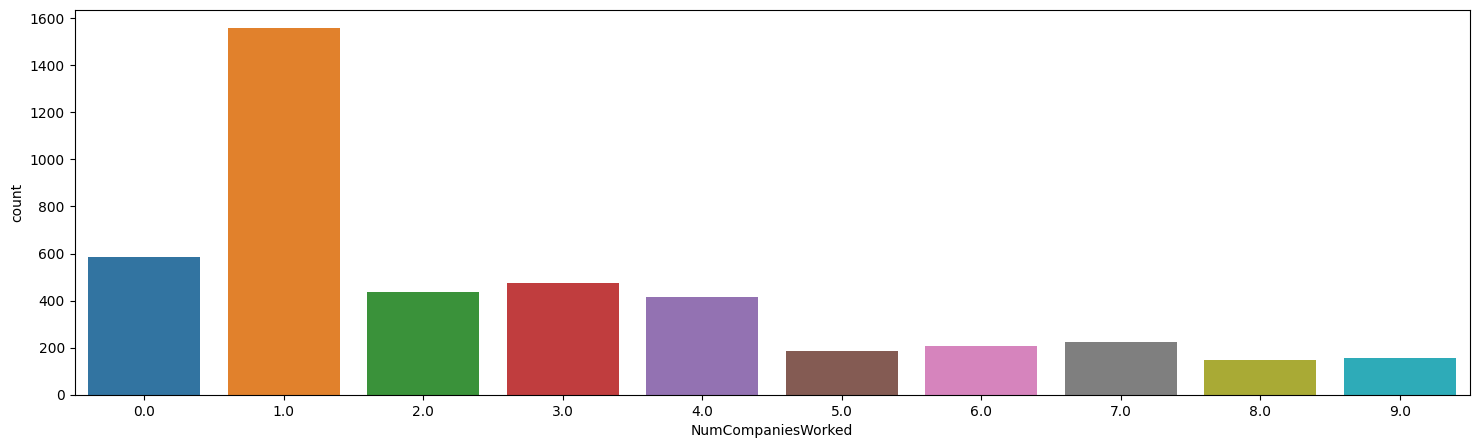

In [46]:
### countplot
plt.figure(figsize=(18,5))
sns.countplot(x='NumCompaniesWorked',data=df)

In [47]:
df['NumCompaniesWorked'].fillna(1.0,inplace=True)

<Axes: xlabel='TotalWorkingYears', ylabel='count'>

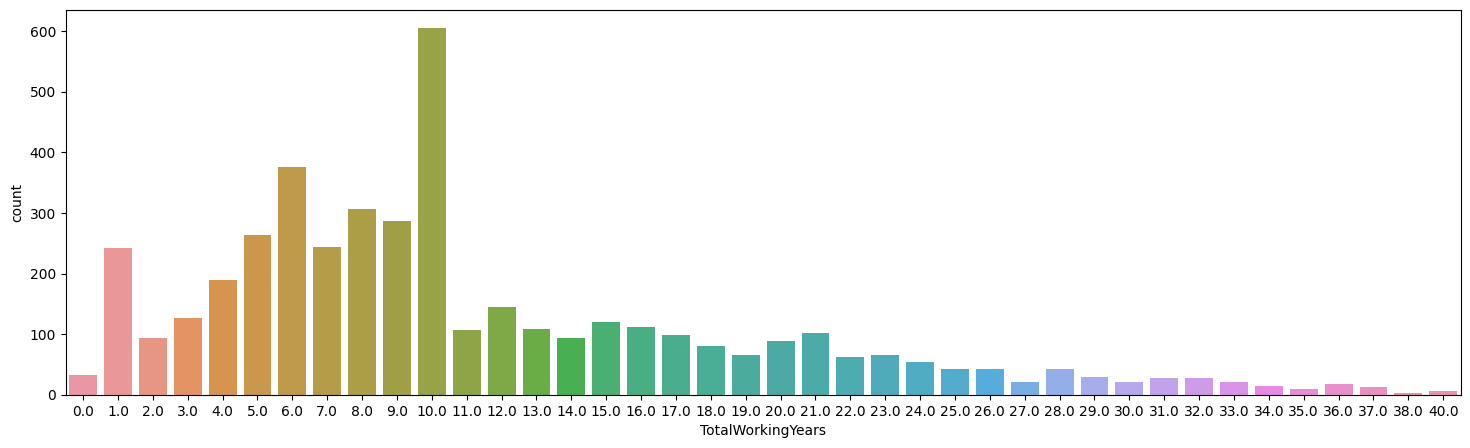

In [48]:
plt.figure(figsize=(18,5))
sns.countplot(x='TotalWorkingYears',data=df)

In [49]:
df['TotalWorkingYears'].fillna(10.0,inplace=True)

<Axes: xlabel='EnvironmentSatisfaction', ylabel='count'>

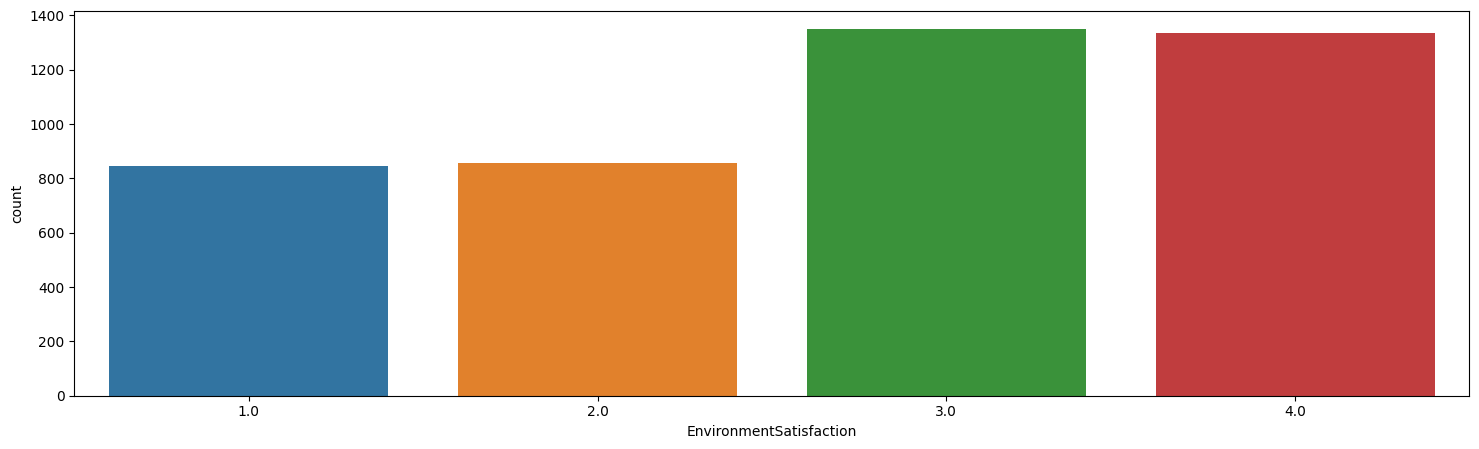

In [50]:
plt.figure(figsize=(18,5))
sns.countplot(x='EnvironmentSatisfaction',data=df)

In [51]:
df['EnvironmentSatisfaction'].fillna(4.0,inplace=True)

<Axes: xlabel='WorkLifeBalance', ylabel='count'>

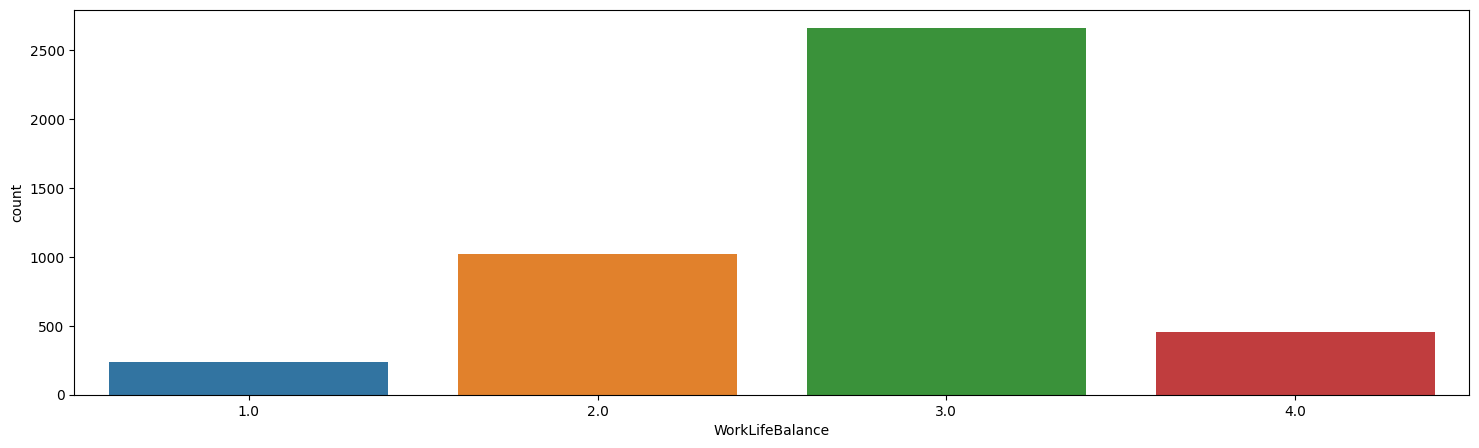

In [52]:
plt.figure(figsize=(18,5))
sns.countplot(x='WorkLifeBalance',data=df)

In [53]:
df['WorkLifeBalance'].fillna(3.0,inplace=True)

In [54]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
JobInvolvement              0
PerformanceRating           0
EnvironmentSatisfaction     0
JobSatisfaction            20
WorkLifeBalance             0
mean_time                   0
dtype: int64

<Axes: xlabel='JobSatisfaction', ylabel='count'>

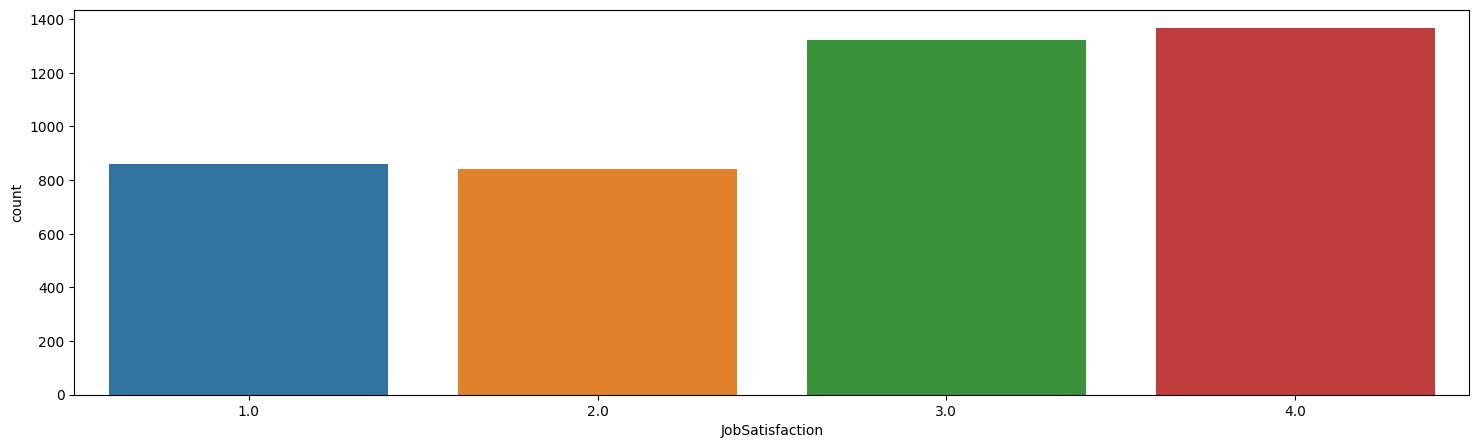

In [55]:
plt.figure(figsize=(18,5))
sns.countplot(x='JobSatisfaction',data=df)

In [56]:
df['JobSatisfaction'].fillna(4.0,inplace=True)

In [57]:
df.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
JobInvolvement             0
PerformanceRating          0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
mean_time                  0
dtype: int64

In [58]:
objcols

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18'],
      dtype='object')

In [59]:
### categorical encoding
one_hot_var = ['BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus']
for i in one_hot_var:
  x_t = pd.get_dummies(df[i],prefix=i,prefix_sep='_',drop_first=True)
  df = df.join(x_t)
  df.drop(i,axis=1,inplace=True)

In [60]:
df

,Age,Attrition,DistanceFromHome,Education,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,mean_time,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,51,No,6,2,1,1,131160,1.0,11,0,1.0,6,1,0,0,3,3,3.0,4.0,2.0,6.87,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,31,Yes,10,1,2,1,41890,0.0,23,1,6.0,3,5,1,4,2,4,3.0,2.0,4.0,7.32,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,32,No,17,4,3,4,193280,1.0,15,3,5.0,2,5,0,3,3,3,2.0,2.0,1.0,6.82,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0
3,38,No,2,5,4,3,83210,3.0,11,3,13.0,5,8,7,5,2,3,4.0,4.0,3.0,6.79,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0
4,32,No,10,1,5,1,23420,4.0,12,2,9.0,2,6,0,4,3,3,4.0,1.0,3.0,7.88,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,5,4,4406,1,60290,3.0,17,1,10.0,5,3,0,2,3,3,4.0,1.0,3.0,8.32,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
4406,29,No,2,4,4407,1,26790,2.0,15,0,10.0,2,3,0,2,2,3,4.0,4.0,3.0,5.90,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0
4407,25,No,25,2,4408,2,37020,0.0,20,0,5.0,4,4,1,2,3,4,1.0,3.0,3.0,7.15,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
4408,42,No,18,2,4409,1,23980,0.0,14,1,10.0,2,9,7,8,2,3,4.0,1.0,3.0,9.19,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4410 non-null   int64  
 1   Attrition                          4410 non-null   object 
 2   DistanceFromHome                   4410 non-null   int64  
 3   Education                          4410 non-null   int64  
 4   EmployeeID                         4410 non-null   int64  
 5   JobLevel                           4410 non-null   int64  
 6   MonthlyIncome                      4410 non-null   int64  
 7   NumCompaniesWorked                 4410 non-null   float64
 8   PercentSalaryHike                  4410 non-null   int64  
 9   StockOptionLevel                   4410 non-null   int64  
 10  TotalWorkingYears                  4410 non-null   float64
 11  TrainingTimesLastYear              4410 non-null   int64

In [62]:
df.Attrition = df.Attrition.apply(lambda x : 1 if x=='Yes' else 0)

In [63]:
df

,Age,Attrition,DistanceFromHome,Education,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,mean_time,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,51,0,6,2,1,1,131160,1.0,11,0,1.0,6,1,0,0,3,3,3.0,4.0,2.0,6.87,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,31,1,10,1,2,1,41890,0.0,23,1,6.0,3,5,1,4,2,4,3.0,2.0,4.0,7.32,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,32,0,17,4,3,4,193280,1.0,15,3,5.0,2,5,0,3,3,3,2.0,2.0,1.0,6.82,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0
3,38,0,2,5,4,3,83210,3.0,11,3,13.0,5,8,7,5,2,3,4.0,4.0,3.0,6.79,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0
4,32,0,10,1,5,1,23420,4.0,12,2,9.0,2,6,0,4,3,3,4.0,1.0,3.0,7.88,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,0,5,4,4406,1,60290,3.0,17,1,10.0,5,3,0,2,3,3,4.0,1.0,3.0,8.32,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
4406,29,0,2,4,4407,1,26790,2.0,15,0,10.0,2,3,0,2,2,3,4.0,4.0,3.0,5.90,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0
4407,25,0,25,2,4408,2,37020,0.0,20,0,5.0,4,4,1,2,3,4,1.0,3.0,3.0,7.15,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
4408,42,0,18,2,4409,1,23980,0.0,14,1,10.0,2,9,7,8,2,3,4.0,1.0,3.0,9.19,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0


In [64]:
df.Attrition.value_counts()

0    3699
1     711
Name: Attrition, dtype: int64

In [65]:
###
df.corr()

,Age,Attrition,DistanceFromHome,Education,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,mean_time,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
Age,1.000000,-0.159205,0.006963,-0.035706,0.008649,-0.002884,-0.044314,0.299186,-0.033137,-0.031753,0.680340,-0.027308,0.311309,0.216513,0.202089,0.018196,-0.025563,0.008322,-0.002712,-0.020524,-0.000360,-0.024743,0.028791,0.018040,-0.015558,-0.001790,-0.032831,0.009673,-0.001543,0.046655,-3.935163e-02,0.001194,0.033969,0.009020,0.001261,-1.605906e-02,0.005834,0.008219,-0.014096,0.083919,-0.119185
Attrition,-0.159205,1.000000,-0.009730,-0.015111,-0.004729,-0.010290,-0.031176,0.041797,0.032533,-0.006839,-0.170162,-0.049431,-0.134392,-0.033019,-0.156199,-0.015588,0.023403,-0.100706,-0.104017,-0.062975,0.198921,0.115143,-0.049538,-0.015307,-0.019742,0.012394,-0.003780,0.000764,-0.025958,-0.040646,1.812508e-02,-0.013857,0.001179,-0.017798,-0.045770,4.976045e-02,0.027460,0.010869,-0.011073,-0.090984,0.175419
DistanceFromHome,0.006963,-0.009730,1.000000,-0.008638,-0.001097,-0.037329,-0.021607,-0.013069,0.038125,0.011169,0.009314,-0.009001,0.031684,0.002290,0.021584,-0.001837,0.036418,0.020070,-0.011532,0.008305,0.009896,-0.001143,0.018528,0.007409,0.003129,0.009607,0.005240,-0.008728,-0.014552,-0.010691,-4.417279e-02,0.001813,0.052249,-0.038859,0.000305,-3.848864e-03,-0.002360,-0.012479,0.005463,0.038151,-0.042204
Education,-0.035706,-0.015111,-0.008638,1.000000,-0.009680,0.045746,0.006410,-0.016151,-0.040531,0.001261,-0.010813,0.010472,0.006080,0.022490,0.005358,-0.018279,-0.035591,-0.046648,-0.006259,-0.005610,0.001450,0.005301,-0.000265,-0.007431,0.001207,0.006435,-0.008889,-0.020869,0.046729,0.003472,-1.654683e-02,0.045063,-0.077518,0.044142,-0.011976,4.969407e-02,0.000709,-0.004180,0.032320,-0.008534,0.024114
EmployeeID,0.008649,-0.004729,-0.001097,-0.009680,1.000000,-0.003303,0.007338,-0.000322,-0.004456,-0.014254,-0.000956,-0.010191,0.004086,0.000256,0.008579,0.008591,-0.006892,-0.000771,-0.000924,-0.002164,-0.010222,-0.001921,-0.001071,-0.014299,0.005417,-0.000302,-0.004620,-0.002975,0.003532,0.001983,-1.316547e-02,-0.008991,-0.008073,-0.001464,0.013529,-2.202476e-03,-0.004666,0.001284,0.009162,0.000419,0.000823
JobLevel,-0.002884,-0.010290,-0.037329,0.045746,-0.003303,1.000000,0.047316,-0.010500,0.010973,0.000993,-0.036779,-0.032500,-0.064219,-0.060811,-0.055251,-0.012630,-0.002474,-0.024937,-0.019896,-0.027763,0.011107,-0.013697,0.039683,-0.036763,0.020701,0.009053,0.035297,-0.031310,-0.011367,0.001202,-2.685434e-02,0.028870,-0.031566,0.025348,-0.004684,3.220675e-02,0.017455,-0.021969,-0.024790,0.007360,-0.021163
MonthlyIncome,-0.044314,-0.031176,-0.021607,0.006410,0.007338,0.047316,1.000000,-0.020222,0.004325,0.026930,-0.033758,0.050112,0.000995,0.065219,0.024304,0.023346,0.016093,-0.004889,0.003461,0.003705,-0.012439,-0.029383,-0.014891,0.063023,-0.051110,0.005027,-0.044386,0.029833,0.003781,-0.005724,7.530386e-03,-0.026453,0.012624,-0.009477,0.029201,2.262309e-03,-0.000567,0.001785,0.001776,0.020189,-0.051774
NumCompaniesWorked,0.299186,0.041797,-0.013069,-0.016151,-0.000322,-0.010500,-0.020222,1.000000,0.031383,0.017490,0.238606,-0.032185,-0.116945,-0.035885,-0.108752,0.028082,0.018604,0.013632,-0.054381,-0.008771,-0.015850,-0.040506,0.033568,0.051726,-0.029036,0.008135,0.012594,-0.012128,-0.002824,0.

In [66]:
### one more feature selection - extra tree regressor
x = df.drop('Attrition',axis=1)
y= df['Attrition']

In [67]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
feat_impo = model.fit(x,y)
feat_impo.feature_importances_

array([0.05376852, 0.03236005, 0.03158354, 0.00035654, 0.02587067,
       0.03034454, 0.03809846, 0.02601043, 0.02837083, 0.05602912,
       0.02597712, 0.04132729, 0.03407723, 0.03812058, 0.03147976,
       0.01315552, 0.04222266, 0.04311082, 0.03457254, 0.070457  ,
       0.02842789, 0.01036627, 0.01435013, 0.01454893, 0.01686388,
       0.00987551, 0.01488497, 0.00653294, 0.00795354, 0.02333993,
       0.00864635, 0.0158135 , 0.00796349, 0.00939741, 0.01552072,
       0.01983794, 0.01947222, 0.01218571, 0.01132134, 0.0354041 ])

<Axes: >

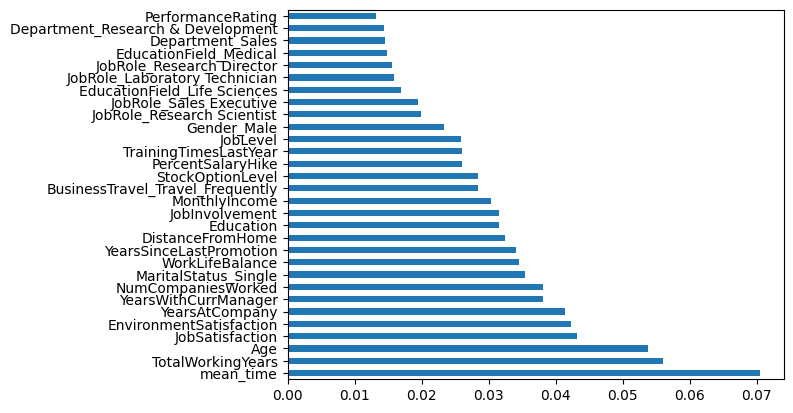

In [68]:
imp = pd.Series(feat_impo.feature_importances_,index=x.columns)
imp.nlargest(30).plot(kind='barh')

In [69]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
x_sm,y_sm = smote.fit_resample(x,y)

In [70]:
y_sm.value_counts()

0    3699
1    3699
Name: Attrition, dtype: int64

In [71]:
#### multicollinaerity

In [72]:
x.corr()

,Age,DistanceFromHome,Education,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,mean_time,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
Age,1.000000,0.006963,-0.035706,0.008649,-0.002884,-0.044314,0.299186,-0.033137,-0.031753,0.680340,-0.027308,0.311309,0.216513,0.202089,0.018196,-0.025563,0.008322,-0.002712,-0.020524,-0.000360,-0.024743,0.028791,0.018040,-0.015558,-0.001790,-0.032831,0.009673,-0.001543,0.046655,-3.935163e-02,0.001194,0.033969,0.009020,0.001261,-1.605906e-02,0.005834,0.008219,-0.014096,0.083919,-0.119185
DistanceFromHome,0.006963,1.000000,-0.008638,-0.001097,-0.037329,-0.021607,-0.013069,0.038125,0.011169,0.009314,-0.009001,0.031684,0.002290,0.021584,-0.001837,0.036418,0.020070,-0.011532,0.008305,0.009896,-0.001143,0.018528,0.007409,0.003129,0.009607,0.005240,-0.008728,-0.014552,-0.010691,-4.417279e-02,0.001813,0.052249,-0.038859,0.000305,-3.848864e-03,-0.002360,-0.012479,0.005463,0.038151,-0.042204
Education,-0.035706,-0.008638,1.000000,-0.009680,0.045746,0.006410,-0.016151,-0.040531,0.001261,-0.010813,0.010472,0.006080,0.022490,0.005358,-0.018279,-0.035591,-0.046648,-0.006259,-0.005610,0.001450,0.005301,-0.000265,-0.007431,0.001207,0.006435,-0.008889,-0.020869,0.046729,0.003472,-1.654683e-02,0.045063,-0.077518,0.044142,-0.011976,4.969407e-02,0.000709,-0.004180,0.032320,-0.008534,0.024114
EmployeeID,0.008649,-0.001097,-0.009680,1.000000,-0.003303,0.007338,-0.000322,-0.004456,-0.014254,-0.000956,-0.010191,0.004086,0.000256,0.008579,0.008591,-0.006892,-0.000771,-0.000924,-0.002164,-0.010222,-0.001921,-0.001071,-0.014299,0.005417,-0.000302,-0.004620,-0.002975,0.003532,0.001983,-1.316547e-02,-0.008991,-0.008073,-0.001464,0.013529,-2.202476e-03,-0.004666,0.001284,0.009162,0.000419,0.000823
JobLevel,-0.002884,-0.037329,0.045746,-0.003303,1.000000,0.047316,-0.010500,0.010973,0.000993,-0.036779,-0.032500,-0.064219,-0.060811,-0.055251,-0.012630,-0.002474,-0.024937,-0.019896,-0.027763,0.011107,-0.013697,0.039683,-0.036763,0.020701,0.009053,0.035297,-0.031310,-0.011367,0.001202,-2.685434e-02,0.028870,-0.031566,0.025348,-0.004684,3.220675e-02,0.017455,-0.021969,-0.024790,0.007360,-0.021163
MonthlyIncome,-0.044314,-0.021607,0.006410,0.007338,0.047316,1.000000,-0.020222,0.004325,0.026930,-0.033758,0.050112,0.000995,0.065219,0.024304,0.023346,0.016093,-0.004889,0.003461,0.003705,-0.012439,-0.029383,-0.014891,0.063023,-0.051110,0.005027,-0.044386,0.029833,0.003781,-0.005724,7.530386e-03,-0.026453,0.012624,-0.009477,0.029201,2.262309e-03,-0.000567,0.001785,0.001776,0.020189,-0.051774
NumCompaniesWorked,0.299186,-0.013069,-0.016151,-0.000322,-0.010500,-0.020222,1.000000,0.031383,0.017490,0.238606,-0.032185,-0.116945,-0.035885,-0.108752,0.028082,0.018604,0.013632,-0.054381,-0.008771,-0.015850,-0.040506,0.033568,0.051726,-0.029036,0.008135,0.012594,-0.012128,-0.002824,0.012947,-6.754701e-02,0.025452,0.007343,-0.005501,0.003634,1.281429e-02,-0.019875,-0.018897,0.013308,-0.014794,-0.020148
PercentSalaryHike,-0.033137,0.038125,-0.040531,-0.004456,0.010973,0.004325,0.031383,1.000000,0.012548,-0.018810,-0.037392,-0.029707,-0.029542,-0.040864,-0.004658,0.773550,0.000890,0.030078,-0.040305,0.026739,-0.005724,-0.020287,0.030735,-0.020403,0.010209,-0.027726,0.029116,0.019297,-0.042701,1.184147e-02,-0.035124,0.039401,-0.003199,-0.017697,-9.640495e-03,-0.009871,-0.

In [73]:
### two forloops
for i in range(x.corr().shape[0]):
  for j in range(x.corr().shape[1]):
    if(abs(x.corr().iloc[i,j])>0.9) & (abs(x.corr().iloc[i,j])!=1):
      print(round(x.corr().iloc[i,j],2), x.corr().columns[j], '&', x.corr().index[i])



-0.91 Department_Sales & Department_Research & Development
-0.91 Department_Research & Development & Department_Sales


In [74]:
df[['Department_Sales','Department_Research & Development','Attrition']].corr()

,Department_Sales,Department_Research & Development,Attrition
Department_Sales,1.000000,-0.906818,-0.019742
Department_Research & Development,-0.906818,1.000000,-0.015307
Attrition,-0.019742,-0.015307,1.000000


In [75]:
x_sm = x_sm.drop(['Department_Research & Development'],axis=1)

In [76]:
###
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [77]:
## grid search cv
from sklearn.model_selection import GridSearchCV
dt = GridSearchCV(DecisionTreeClassifier(),{'criterion':['gini','entropy'],
                                            'max_depth':[7,9,12,15],
                                            'min_samples_split':[2,4,6,8],
                                            'min_samples_leaf':[2,3,4,5],
                                            'max_features':[1,2]},cv=3)
dt.fit(x_sm,y_sm)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [7, 9, 12, 15], 'max_features': [1, 2],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 4, 6, 8]})

In [78]:
dt.best_score_

0.823736144904028

In [79]:
dt.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'max_features': 1,
 'min_samples_leaf': 2,
 'min_samples_split': 4}

In [80]:
pd.DataFrame(dt.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005990,0.000833,0.002564,0.000123,gini,7,1,2,2,"{'criterion': 'gini', 'max_depth': 7, 'max_fea...",0.627332,0.725466,0.721411,0.691403,0.045336,164
1,0.005334,0.000065,0.002469,0.000031,gini,7,1,2,4,"{'criterion': 'gini', 'max_depth': 7, 'max_fea...",0.666261,0.715328,0.706002,0.695864,0.021276,152
2,0.005236,0.000379,0.002405,0.000019,gini,7,1,2,6,"{'criterion': 'gini', 'max_depth': 7, 'max_fea...",0.343066,0.665045,0.627332,0.545147,0.143720,254
3,0.005306,0.000226,0.002412,0.000034,gini,7,1,2,8,"{'criterion': 'gini', 'max_depth': 7, 'max_fea...",0.638686,0.733577,0.446067,0.606110,0.119614,242
4,0.005470,0.000269,0.002452,0.000037,gini,7,1,3,2,"{'criterion': 'gini', 'max_depth': 7, 'max_fea...",0.651663,0.704785,0.648824,0.668424,0.025737,189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,0.008210,0.000456,0.002541,0.000007,entropy,15,2,4,8,"{'criterion': 'entropy', 'max_depth': 15, 'max...",0.664234,0.841444,0.733171,0.746283,0.072937,55
252,0.008190,0.000507,0.002522,0.000009,entropy,15,2,5,2,"{'criterion': 'entropy', 'max_depth': 15, 'max...",0.664639,0.795215,0.694647,0.718167,0.055841,106
253,0.007856,0.000496,0.002494,0.000067,entropy,15,2,5,4,"{'criterion': 'entropy', 'max_depth': 15, 'max...",0.640714,0.849148,0.572587,0.687483,0.117649,170
254,0.007619,0.000503,0.002511,0.000017,entropy,15,2,5,6,"{'criterion': 'entropy', 'max_depth': 15, 'max...",0.641525,0.850365,0.667072,0.719654,0.093013,105


In [81]:
from sklearn.model_selection import RandomizedSearchCV

In [82]:
clf = RandomizedSearchCV(DecisionTreeClassifier(),{'criterion':['gini','entropy'],
                                            'max_depth':[7,9,12,15],
                                            'min_samples_split':[2,4,6,8],
                                            'min_samples_leaf':[2,3,4,5],
                                            'max_features':[1,2]},cv=4,n_iter=20)

In [83]:
clf.fit(x_sm,y_sm)

RandomizedSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [7, 9, 12, 15],
                                        'max_features': [1, 2],
                                        'min_samples_leaf': [2, 3, 4, 5],
                                        'min_samples_split': [2, 4, 6, 8]})

In [84]:
clf.best_score_

0.8421294929326297

In [85]:
clf.best_params_

{'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 2,
 'max_depth': 15,
 'criterion': 'entropy'}

In [88]:
model_params = {
    'decision_tree': {'model':DecisionTreeClassifier(),'param':{'criterion':['gini','entropy'],
                                            'max_depth':[7,9,12,15],
                                            'min_samples_split':[2,4,6,8],
                                            'min_samples_leaf':[2,3,4,5],
                                            'max_features':[1,2]} },
    'random_forest': {'model':RandomForestClassifier(),'param':{'n_estimators':[1,5,10,15,20],
                                            'max_depth':[7,9,12,15],
                                            'min_samples_split':[2,4,6,8],
                                            'min_samples_leaf':[2,3,4,5],
                                            'max_leaf_nodes':[1,2,5]} },
    'xgboost': {'model':XGBClassifier(),'param':{'n_estimators':[1,4,6,12,16,20],
                                            'max_depth':[3,5,7,10,15],
                                            'learning_rate':[0.1,0.2,0.3,0.01]} },
    'logistic': {'model':LogisticRegression(),'param':{'C':[1,4,6,12,16,20],
                                            'max_iter':[1,2,3]} },
    'svm': {'model':SVC(),'param':{'C':[1,4,6,12,16,20],
                                            'kernel':['rbf','linear']} },
    'knn': {'model':LogisticRegression(),'param':{'n_neighbors':[3,7,11,15],
                                            'metric':['minkowski','euclidean']} }

}

In [92]:
model_params.items()

dict_items([('decision_tree', {'model': DecisionTreeClassifier(), 'param': {'criterion': ['gini', 'entropy'], 'max_depth': [7, 9, 12, 15], 'min_samples_split': [2, 4, 6, 8], 'min_samples_leaf': [2, 3, 4, 5], 'max_features': [1, 2]}}), ('random_forest', {'model': RandomForestClassifier(), 'param': {'n_estimators': [1, 5, 10, 15, 20], 'max_depth': [7, 9, 12, 15], 'min_samples_split': [2, 4, 6, 8], 'min_samples_leaf': [2, 3, 4, 5], 'max_leaf_nodes': [1, 2, 5]}}), ('xgboost', {'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=

In [ ]:
score = []
for model_name,mp in model_params.items():
  clf = GridSearchCV(mp['model'],mp['param'],cv=10)
  clf.fit(x_sm,y_sm)
  score.append({
      'model': model_name,
      'best_score': clf.best_score_,
      'best_params':clf.best_params_
  })
